## Session 01: Linear Regression

In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.seed(42)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

We'll use the wine quality data for this notebook

### General Model

$\hat{y} = \hat{f}(X) + \epsilon$

$\epsilon_i = y_i - \hat{y}_i$ is the ith residual, the difference between the ith response value and our predicted value

We defined the _residual sum of squares_ RSS as:

$RSS = \sum_{i} e_{i}^2$

The least squares approach chooses parameters to minimize the RSS.

The accuracy of $\hat{y}$ depends on two quantities, which we call as reducible error and irreducible error.

The inability of $\hat{f}$ to be a good estimate of $f$ is called reducible error, since it is possible to improve this by using the most appropriate statistical learning techniqie.

However, even if $\hat{f}$ is a perfect estimate, Y is also a function of $\epsilon$, which cannot be predicted using X. This is called irreducible error, because no matter how well we estimate $f$, we cannot reduct this error.

This is more popularly seen in the following form:

$$E(Y - \hat{Y})^2 = E[f(X) + \epsilon - \hat{f}(X)]^2  \\
  = [f(X) - \hat{f}(X)]^2 + Var(\epsilon)
$$

### Univariate Linear Regression

This is basically linear regression with 1 predictor variable.

Model:   
$y = \theta_0 + \theta_1 x$

There are two ways to fit a linear regression model, depending on the number of features. For a smaller number of features (say <10k), you can use the Normal equation form to solve for $\theta$ directly.

For more than 10k features, you probably want to use gradient descent.

Assuming that we write the model in matrix form as:

$y = \Theta^T X$,

where $\Theta, X \in \mathbb{R}^{n}$,

The Normal equation is given by:

$\Theta = (X^T X)^{-1} X^T y$

It can be shown that by similfying the above Normal equation, for the single predictor case, we get:
    
$$\theta_1 = \frac{\sum_{i = 1}^{n} (x_i - \overline{x}) (y_i - \overline{y})}{\sum_{i = 1}^{n} (x_i - \overline{x})^2}$$

$$\theta_0 = \overline{y} - \theta_1 \overline{x}$$

In [4]:
cars = np.genfromtxt('cars.csv', delimiter=',', names=True)

In [5]:
x0 = np.ones(len(cars)) # Models the intercept
x = cars['speed']

In [6]:
X = np.array([x0, x]).T
y = cars['dist']

In [7]:
theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), y)

In [8]:
theta

array([-17.57909489,   3.93240876])

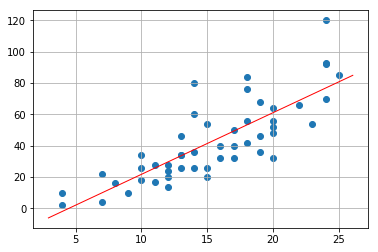

In [9]:
fig, ax = plt.subplots()
ax.scatter(x, y)
x1, x2 = ax.get_xlim()
y1, y2 = np.dot(theta, [1, x1]), np.dot(theta, [1, x2])
ax.plot([x1, x2], [y1, y2], linewidth=1, c='red')
ax.grid()

In [10]:
# Sanity check
theta_1 = np.dot((x - np.mean(x)), (y - np.mean(y))) / np.sum((x - np.mean(x))**2)
theta_0 = np.mean(y) - theta_1 * np.mean(x)

theta_0, theta_1

(-17.579094890510959, 3.9324087591240882)

### Multivariate Linear Regression

This is linear regression with multiple predictor variables.

Model:
    
$y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3 \ldots + \theta_n x_n$

In [11]:
wine = pd.read_csv('winequality-red.csv', sep=';')

In [12]:
wine.shape

(1599, 12)

In [13]:
wine_train, wine_test = wine[:1200], wine[1200:]

In [14]:
x0 = np.ones((len(wine_train), 1)) # models the intercept
X = wine_train.drop('quality', axis=1).values

In [15]:
X = np.concatenate([x0, X], axis=1)

In [16]:
y = wine_train['quality'].values

In [17]:
theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), y)

In [18]:
theta

array([  4.26148353e+01,   4.68226978e-02,  -1.06858847e+00,
        -2.69078072e-01,   3.46373237e-02,  -1.60559854e+00,
         3.48715209e-03,  -3.77404055e-03,  -3.91307833e+01,
        -2.53835069e-01,   7.71874679e-01,   2.69457226e-01])

In [19]:
x0 = np.ones((len(wine_test), 1)) # models the intercept
x_test = wine_test.drop('quality', axis=1).values
X = np.concatenate([x0, x_test], axis=1)

In [20]:
expected = wine_test['quality']
predictions = np.matmul(X, theta)

In [21]:
pd.DataFrame({'expected': expected, 'predictions': predictions})[5:15]

,expected,predictions
1205,7,6.123699
1206,7,6.123699
1207,5,5.425015
1208,7,6.123699
1209,7,6.192969
1210,6,5.648277
1211,5,5.419992
1212,6,5.648277
1213,6,6.076723
1214,6,5.939480


We can see that the regression model doesn't do too badly on some of the records, though we would need a more formal way to measure this

### Model Accuracy

We split our data into train and test sets:

In [22]:
x0 = np.ones((len(wine_train), 1)) # models the intercept
X = wine_train.drop('quality', axis=1).values
X = np.concatenate([x0, X], axis=1)

train_y = wine_train['quality'].values
train_y_hat = np.matmul(X, theta)

In [23]:
x0 = np.ones((len(wine_test), 1)) # models the intercept
X = wine_test.drop('quality', axis=1).values
X = np.concatenate([x0, X], axis=1)

test_y = wine_test['quality'].values
test_y_hat = np.matmul(X, theta)

A good benchmark is to check the performance against the most naive model. In the regression case, we can use a model that always predicts the mean response as a benchmark:

In [24]:
benchmark_y_hat = np.ones(len(test_y)) * np.mean(test_y)

#### Residual Sum of Squares (RSS)

Formula:
    
$$RSS = \sum_{i = 1}^{n} (y_i - \hat{y_i})^2$$

In [25]:
def rss(y_true, y_pred):
    return np.dot(y_true - y_pred, y_true - y_pred)

In [26]:
train_rss = rss(train_y, train_y_hat)
train_rss

488.86658602015399

In [27]:
test_rss = rss(test_y, test_y_hat)
test_rss

183.08042389268061

In [28]:
rss(test_y, benchmark_y_hat)

252.79699248120298

#### Residual Standard Error

The RSE is an estimate of the standard deviation of $\epsilon$. Roughly speaking, it is the average amount that the response will deviate from the true regression line.

Formula:

$$RSE = \sqrt{\frac{RSS}{n - 2}}$$

In [29]:
def rse(y_true, y_pred):
    return np.sqrt(rss(y_true, y_pred) / (len(y_true) - 2))

In [30]:
train_rse = rse(train_y, train_y_hat)
train_rse

0.63880273682707245

In [31]:
test_rse = rse(test_y, test_y_hat)
test_rse

0.6790874449701394

In [32]:
rse(test_y, benchmark_y_hat)

0.79797759556625414

#### Mean Squared Error

In [33]:
def mse(y_true, y_pred):
    return rss(y_true, y_pred) / len(y_true)

In [34]:
train_mse = mse(train_y, train_y_hat)
train_mse

0.40738882168346163

In [35]:
test_mse = mse(test_y, test_y_hat)
test_mse

0.45884818018215695

In [36]:
mse(test_y, benchmark_y_hat)

0.63357642225865407

### The Bias-Variance Tradeoff

### Using Gradient Descent

For cases where we have more than ~10k features (extremely common if you're considering polynomial regression, or including interaction terms), we can no longer use the Normal equation form. For such cases, we can use gradient descent.

In gradient descent, we move in the opposite direction of the gradient. For least-squares regression (what we've been doing till now), the gradient can be derived as follows:

$J(\theta) = \frac{1}{n} \sum_{i = 1}^{n} (\hat{y_i} - y_i)^2 $

$J(\theta) = \frac{1}{n} \sum_{i = 1}^{n} (h_{\theta}(x_i) - y_i)^2 $

where 

$h_{\theta}(x_i) = \theta^T X$

We have:

$\frac{dh}{d\theta_j} = X_j$, where $X_j$ is the jth feature.

Thus we get the partial derivative of J w.r.t. $\theta_j$ as 

$\frac{d J(\theta)}{d\theta_j} = \frac{1}{n} \sum_{i = 1}^{n} 2(h_{\theta}(x_i) - y_i)X_{ij} $, 

where $X_{ij}$ is the jth feature in the ith example.

The gradient is just the vector of all the partial derivatives. Also remember that our $X_0$ was just a dummy variable, and is always 1.

In [37]:
cars = np.genfromtxt('cars.csv', delimiter=',', names=True)

x0 = np.ones(len(cars)) # Models the intercept
x = cars['speed']

X = np.array([x0, x]).T
y = cars['dist']

In [38]:
def evaluate_gradient(X, y, y_pred):
    n = len(y_pred)
    return (2/n) * np.matmul((y_pred - y), X)

In [39]:
def gradient_descent(X, y, learning_rate=0.001, iters=20000):
    # Initialize theta to all zeros
    theta = np.zeros(X.shape[1])
    
    for i in range(iters):
        # Predict
        y_pred = np.matmul(X, theta)
        
        # Calculate gradient
        theta_grad = evaluate_gradient(X, y, y_pred)
        
        # Update weights
        theta = theta - learning_rate*theta_grad

    return theta

In [40]:
theta = gradient_descent(X, y)

In [41]:
theta

array([-17.2934172 ,   3.91577301])

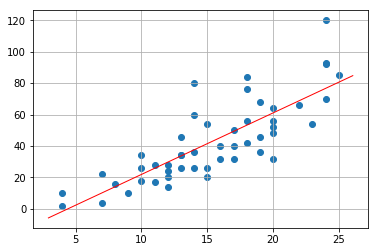

In [42]:
fig, ax = plt.subplots()
ax.scatter(x, y)
x1, x2 = ax.get_xlim()
y1, y2 = np.dot(theta, [1, x1]), np.dot(theta, [1, x2])
ax.plot([x1, x2], [y1, y2], linewidth=1, c='red')
ax.grid()

We can see that we get the same regression coefficients as we got from the Normal equations.

### The L1/L2 Norm